# References

Graphene index: https://opg.optica.org/oe/fulltext.cfm?uri=oe-16-26-22105&id=175532

Si+Sio2 index: https://refractiveindex.info/?shelf=main&book=SiO2&page=Malitson

Fresnel: https://pubs-acs-org.stanford.idm.oclc.org/doi/pdf/10.1021/nl071254m

Transfer matrix: Optical properties of thin solid films

# Propagation matrix method

To solve the problem of the optical properties of graphene on SiO2 on Si, we can use the transfer matrix approach to solve for the reflection and transmission coefficients. We will only consider normal incidence such that:

\begin{equation*}
\begin{pmatrix}
E_{in} \\
E_r
\end{pmatrix} = M 
\begin{pmatrix}
E_t \\
0
\end{pmatrix}
\end{equation*}


where $M$ is the propagation matrix. This matrix will account for the three interfaces and two propagation matrices. Then 

\begin{equation*}
M = \frac{1}{t_{01}}
\begin{pmatrix}
1 & r_{01} \\
r_{01} & 1
\end{pmatrix}
\begin{pmatrix}
e^{i\beta_1} & 0 \\
0 & e^{-i\beta_1}
\end{pmatrix}
\frac{1}{t_{12}}
\begin{pmatrix}
1 & r_{12} \\
r_{12} & 1
\end{pmatrix}
\begin{pmatrix}
e^{i\beta_2} & 0 \\
0 & e^{-i\beta_2}
\end{pmatrix}
\frac{1}{t_{23}}
\begin{pmatrix}
1 & r_{23} \\
r_{23} & 1
\end{pmatrix}
\end{equation*}



Where the $r$'s and $t$'s are the appropriate Fresnel coefficients and $\beta_1 = 2\pi \mathbf{n}_1 (t_1/\lambda)$ and $\beta_2 = 2\pi \mathbf{n}_2 (t_2/\lambda)$ are the accrued phases difference when passing through the different media. We can easily find the reflectance and transmittance:

\begin{equation*}
r = M_{21}/M_{11}
\end{equation*}

\begin{equation*}
t = 1/M_{11}
\end{equation*}

I won't calculate the full matrix, but we can calculate the reflectance and transmittance to be:

\begin{equation*}
r(\lambda) = \frac{r_{01} e^{i(\beta_1+\beta_2)} + r_{12} e^{-i(\beta_1+\beta_2)} + r_{23} e^{-i(\beta_1 + \beta_2)} + r_{01} r_{12} r_{23} e^{i(\beta_1-\beta_2)}}
{e^{i(\beta_1 + \beta_2)} + r_{01} r_{12} e^{-(\beta_1 - \beta_2)} + r_{01} r_{23} e^{-i(\beta_1 + \beta_2)} + r_{12} r_{23} e^{i(\beta_1-\beta_2)}}
\end{equation*}

and

\begin{equation*}
t(\lambda) = \frac{t_{01} t_{12} t_{23}}
{e^{i(\beta_1 + \beta_2)} + r_{01} r_{12} e^{-(\beta_1 - \beta_2)} + r_{01} r_{23} e^{-i(\beta_1 + \beta_2)} + r_{12} r_{23} e^{i(\beta_1-\beta_2)}}
\end{equation*}

At normal incidence, the individual Fresnel coefficients for s and p polarization reduce to:

\begin{equation*}
r^s_{ij} = -r^p_{ij} = \frac{\mathbf{n}_i - \mathbf{n}_j}{\mathbf{n}_i + \mathbf{n}_j}
\end{equation*}

\begin{equation*}
t^s_{ij} = t^p_{ij} = \frac{2\mathbf{n}_i}{\mathbf{n}_i + \mathbf{n}_j}
\end{equation*}

These indices  of refraction will generically depend on the wavelength. For white light at an angle, we would expect the different polarizations to contribute different amounts to the effective reflection and transmission coefficient, but that doesn't matter at normal incidence. We can just assume a polarization. Then the reflection coefficient is:

\begin{equation*}
R(\lambda) = \left| r(\lambda) \right|^2
\end{equation*}

and the transmission coefficient
\begin{equation*}
T(\lambda) = \frac{\mathrm{Re}(n_3)}{\mathrm{Re}(n_0)} \left| t(\lambda) \right|^2
\end{equation*}


We can reduce this equation down to a two interface problem (in our case assuming no graphene) by taking $n_1 = n_0$ and $t_1 = 0$ in the above equations, I will call this $R_0(\lambda)$. 

To calculate the contrast between a three interface and a two interface region, we take

\begin{equation*}
C(\lambda) = \frac{R_0(\lambda)-R(\lambda)}{R_0(\lambda)}
\end{equation*}


Finally, if we want to calculate the absorption  of light in our stack, we can use the relation:

\begin{equation*}
A = 1 - R - T
\end{equation*}

Luckily for our case of graphene on SiO2 on Si, the light we are considering is below the bandgap of SiO2, so we will ignore it's contribution to the absorption  of light.

# Calculations

## Init

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler


# Set default plotting parameters
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.top'] = 'True'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = 'True'

plt.rcParams['axes.prop_cycle'] = cycler(
    color=['#E24A33','#23768D','#988ED5','#777777','#FBC15E','#8EBA42','#FFB5B8','#4a4a4a','#244747'])

plt.rcParams['axes.edgecolor'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'
plt.rcParams['figure.facecolor'] = 'white'


# Font sizes
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.title_fontsize'] = 16

# Linewidths
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['xtick.minor.size'] = 2.5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['ytick.minor.size'] = 2.5
plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['lines.linewidth'] = 2.5

plt.rcParams['figure.figsize'] = [3*1.618, 3]
#plt.rcParams['figure.dpi'] = 600

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'pdf')

In [2]:
data_si = np.loadtxt('Si_index.csv', delimiter=',', skiprows=1)
data_sio2 = np.loadtxt('SiO2_index.csv', delimiter=',', skiprows=1)
data_si[:, 0] *= 1000
data_sio2[:, 0] *= 1000
n0 = 1

t_gr = 0.335

In [3]:
def natlambda(lamb, data):
    n = np.interp(lamb, data[:, 0], data[:, 1])
    k = np.interp(lamb, data[:, 0], data[:, 2])
    return (n, k)

def reflection(lamb, N_layers, t_oxide):
    if N_layers == 0:
        n1 = 1
        beta1 = 0
    else:
        n1 = n_gr
        beta1 = 2*np.pi*n1*(t_gr*N_layers/lamb)
    
    n, k = natlambda(lamb, data_sio2)
    n2 = n - 1j*k
    beta2 = 2*np.pi*n2*(t_oxide/lamb)

    n, k = natlambda(lamb, data_si)
    n3 = n - 1j*k

    r1 = (n0 - n1)/(n0 + n1)
    r2 = (n1 - n2)/(n1 + n2)
    r3 = (n2 - n3)/(n2 + n3)

    r_num = (r1*np.exp(1j*(beta1+beta2)) + r2*np.exp(-1j*(beta1-beta2)) + r3*np.exp(-1j*(beta1+beta2)) + r1*r2*r3*np.exp(1j*(beta1-beta2)))
    r_den = (np.exp(1j*(beta1+beta2)) + r1*r2*np.exp(-1j*(beta1-beta2)) + r1*r3*np.exp(-1j*(beta1+beta2)) + r2*r3*np.exp(1j*(beta1-beta2)))
    r = r_num/r_den
    R = r * r.conjugate()
    return R.real

def transmission(lamb, N_layers, t_oxide):
    if N_layers == 0:
        n1 = 1
        beta1 = 0
    else:
        n1 = n_gr
        beta1 = 2*np.pi*n1*(t_gr*N_layers/lamb)
    
    n, k = natlambda(lamb, data_sio2)
    n2 = n - 1j*k
    beta2 = 2*np.pi*n2*(t_oxide/lamb)

    n, k = natlambda(lamb, data_si)
    n3 = n - 1j*k

    r1 = (n0 - n1)/(n0 + n1)
    r2 = (n1 - n2)/(n1 + n2)
    r3 = (n2 - n3)/(n2 + n3)
    t1 = 2*n0/(n0 + n1)
    t2 = 2*n1/(n1 + n2)
    t3 = 2*n2/(n2 + n3)

    t_num = (t1*t2*t3)
    t_den = (np.exp(1j*(beta1+beta2)) + r1*r2*np.exp(-1j*(beta1-beta2)) + r1*r3*np.exp(-1j*(beta1+beta2)) + r2*r3*np.exp(1j*(beta1-beta2)))
    t = t_num/t_den
    T = (n3.real/n0.real) * t * t.conjugate()
    return T.real

def contrast(lamb, N_layers, t_oxide):
    R = reflection(lamb, N_layers, t_oxide)
    R0 = reflection(lamb, 0, t_oxide)
    return (R0 - R)/R0

def absoprtion(lamb, N_layers, t_oxide):
    R = reflection(lamb, N_layers, t_oxide)
    T = transmission(lamb, N_layers, t_oxide)
    return 1 - R - T

# Index of graphene

In [4]:
n_gr = 2.4 - 1j

## Index of Si

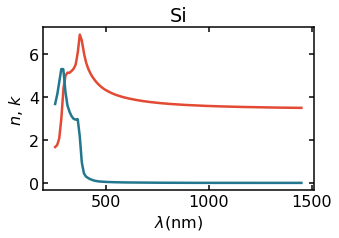

In [5]:
plt.figure()
n = []
k = []
lamb_range = np.linspace(data_si[0, 0], data_si[-1, 0], 1000)
for lamb in lamb_range:
    n_lamb, k_lamb = natlambda(lamb, data_si)
    n.append(n_lamb)
    k.append(k_lamb)
plt.plot(lamb_range, n)
plt.plot(lamb_range, k)

plt.title('Si')
plt.xlabel(r'$\lambda(\mathrm{nm})$')
plt.ylabel(r'$n, \,k$')
plt.savefig('./optics_files/optics_10_1.png', bbox_inches='tight', dpi=500, transparent=True)

## Index of SiO2

We assume the absoprtion at these wavelengths is negligable 

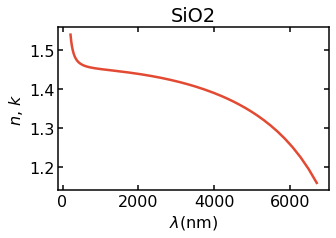

In [6]:
plt.figure()
n = []
k = []
lamb_range = np.linspace(data_sio2[0, 0], data_sio2[-1, 0], 1000)
for lamb in lamb_range:
    n_lamb, k_lamb = natlambda(lamb, data_sio2)
    n.append(n_lamb)
    k.append(k_lamb)
plt.plot(lamb_range, n)

plt.title('SiO2')
plt.xlabel(r'$\lambda(\mathrm{nm})$')
plt.ylabel(r'$n, \,k$')
plt.savefig('./optics_files/optics_12_1.png', bbox_inches='tight', dpi=500, transparent=True)

## Contrast

Here we calculate the optical contrast of graphene relative to the SiO2 background

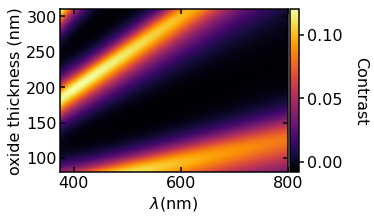

In [7]:
C_mat = []
t_range = np.linspace(80, 310, 100)
for t_oxide in t_range:
    C = []
    lamb_range = np.linspace(375, 800, 100)
    for lamb in lamb_range:
        C.append(contrast(lamb, 1, t_oxide))
    C_mat.append(C)

plt.figure()
plt.set_cmap('inferno')
plt.pcolormesh(lamb_range, t_range, C_mat, shading='gouraud', linewidth=0, rasterized=True)

plt.xlabel(r'$\lambda(\mathrm{nm})$')
plt.ylabel('oxide thickness (nm)')

cbar = plt.colorbar(pad = 0.01)
#plt.clim(-0.10, 0.10)
cbar.ax.get_yaxis().labelpad = 25
cbar.set_label('Contrast', rotation=270)
cbar.ax.tick_params(which = 'major',direction='out')
cbar.ax.tick_params(which = 'minor',direction='out')
plt.savefig('hsv.png', bbox_inches='tight', dpi=500, transparent=True)

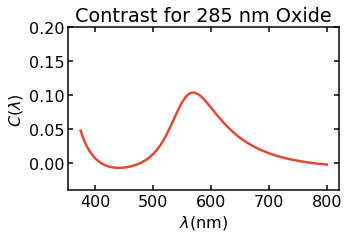

In [8]:
C = []
lamb_range = np.linspace(375, 800, 1000)
for lamb in lamb_range:
    C.append(contrast(lamb, 1, 285))

plt.plot(lamb_range, C)
plt.ylim(-0.04, 0.2)
plt.xlabel(r'$\lambda(\mathrm{nm})$')
plt.ylabel(r'$C(\lambda)$')
plt.title('Contrast for 285 nm Oxide')
plt.savefig('./optics_files/optics_15_1.png', bbox_inches='tight', dpi=500, transparent=True)

## Absorption in graphene layer

Now let's calculate how much light is being absobed by the graphene at a given wavelength for a given oxide thickness

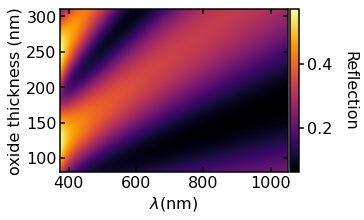

In [9]:
C_mat = []
t_range = np.linspace(80, 310, 100)
for t_oxide in t_range:
    C = []
    lamb_range = np.linspace(375, 1050, 100)
    for lamb in lamb_range:
        C.append(reflection(lamb, 1, t_oxide))
    C_mat.append(C)

plt.figure()
plt.set_cmap('inferno')
plt.pcolormesh(lamb_range, t_range, C_mat, shading='gouraud', linewidth=0, rasterized=True)

plt.xlabel(r'$\lambda(\mathrm{nm})$')
plt.ylabel('oxide thickness (nm)')

cbar = plt.colorbar(pad = 0.01)
#plt.clim(-0.10, 0.10)
cbar.ax.get_yaxis().labelpad = 25
cbar.set_label('Reflection', rotation=270)
cbar.ax.tick_params(which = 'major',direction='out')
cbar.ax.tick_params(which = 'minor',direction='out')
plt.savefig('./optics_files/optics_17_0.png', bbox_inches='tight', dpi=500, transparent=True)

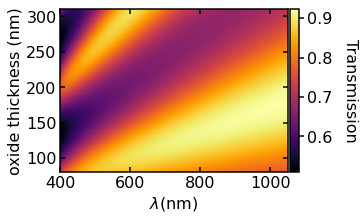

In [10]:
C_mat = []
t_range = np.linspace(80, 310, 100)
for t_oxide in t_range:
    C = []
    lamb_range = np.linspace(400, 1050, 100)
    for lamb in lamb_range:
        C.append(transmission(lamb, 1, t_oxide))
    C_mat.append(C)

plt.figure()
plt.set_cmap('inferno')
plt.pcolormesh(lamb_range, t_range, C_mat, shading='gouraud', linewidth=0, rasterized=True)

plt.xlabel(r'$\lambda(\mathrm{nm})$')
plt.ylabel('oxide thickness (nm)')

cbar = plt.colorbar(pad = 0.01)
#plt.clim(-0.10, 0.10)
cbar.ax.get_yaxis().labelpad = 25
cbar.set_label('Transmission', rotation=270)
cbar.ax.tick_params(which = 'major',direction='out')
cbar.ax.tick_params(which = 'minor',direction='out')
plt.savefig('./optics_files/optics_18_0.png', bbox_inches='tight', dpi=500, transparent=True)

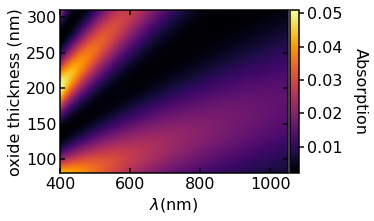

In [11]:
C_mat = []
t_range = np.linspace(80, 310, 100)
for t_oxide in t_range:
    C = []
    lamb_range = np.linspace(400, 1050, 100)
    for lamb in lamb_range:
        C.append(absoprtion(lamb, 1, t_oxide))
    C_mat.append(C)

plt.figure()
plt.set_cmap('inferno')
plt.pcolormesh(lamb_range, t_range, C_mat, shading='gouraud', linewidth=0, rasterized=True)

plt.xlabel(r'$\lambda(\mathrm{nm})$')
plt.ylabel('oxide thickness (nm)')

cbar = plt.colorbar(pad = 0.01)
#plt.clim(-0.10, 0.10)
cbar.ax.get_yaxis().labelpad = 25
cbar.set_label('Absorption', rotation=270)
cbar.ax.tick_params(which = 'major',direction='out')
cbar.ax.tick_params(which = 'minor',direction='out')
plt.savefig('./optics_files/optics_19_0.png', bbox_inches='tight', dpi=500, transparent=True)

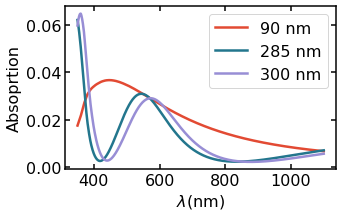

In [12]:
plt.figure()
for t_oxide in [90, 285, 300]:
    A = []
    lamb_range = np.linspace(350, 1100, 1000)
    for lamb in lamb_range:
        A.append(absoprtion(lamb, 1, t_oxide))

    plt.plot(lamb_range, A, label=str(t_oxide)+' nm')
plt.xlabel(r'$\lambda(\mathrm{nm})$')
plt.ylabel(r'Absoprtion')
plt.legend()
plt.savefig('./optics_files/optics_20_0.png', bbox_inches='tight', dpi=500, transparent=True)